In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gamma

In [2]:
X = pd.read_csv("gaussian_1d.csv",names=['X'])

In [3]:
#mu = 2
#tau = 2

In [4]:
def IVGU(X,t_max = 20):
    N = len(X)
    t_max = 20

    #L = np.zeros(t_max)

    #Escolha os Hiperparâmetros das prioris: uo, ko, ao, bo

    u0 = 0
    k0 = 0.2
    a0 = 2
    b0 = 0.2


    #calcular un e an

    un = (k0 * u0 + X.mean()*N) / (k0 + N)

    an = a0 + (N + 1)/2

    #INICIALIZAR KN E BN

    kn = 2
    bn = b0 + ((k0/2) * ((1/kn) + (un-u0)**2)) + (1/2) * np.sum((1/kn) + (X-un)**2)

    for i in range(t_max):

        kn = (k0 + N)*an/bn

        bn = b0 + (k0/2) * ((1/kn) + (un-u0)**2) + (1/2) * np.sum((1/kn) + (X-un)**2)

        #L[i] = -(1 / 2) * np.log(kn) + np.log(gamma(an)) - an * np.log(bn)
    bn = float(bn)                       
    print("E[q(u)] = " + str(float(un)))
    print("E[q(t)] = " + str(an/bn))
    
    #plot    
    X_test = np.linspace(-10,10,1000)
    X_test_ = np.linspace(0,25,1000)
    X_test_pdf_priori_u = stats.norm.pdf(X_test, u0, 1/np.sqrt(k0))
    X_test_pdf_posteriori_u = stats.norm.pdf(X_test, un, 1/np.sqrt(kn))
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].plot(X_test,X_test_pdf_posteriori_u,label = 'Posteriori de u')
    ax[0].plot(X_test,X_test_pdf_priori_u,label = 'Priori de u',color='y')
    ax[0].axvline(float(un),label= "E[q(u)]",color = 'green')
    ax[0].axvline(2,label= "Mu real",color = 'red')
    ax[0].legend()

    
    X_test_pdf_priori_t = stats.gamma.pdf(X_test_, a0, scale = 1/b0)
    X_test_pdf_posteriori_t = stats.gamma.pdf(X_test_, an, scale = 1/bn)
    

    ax[1].plot(X_test_, X_test_pdf_posteriori_t, label = 'Posteriori de t')
    ax[1].plot(X_test_, X_test_pdf_priori_t, label = 'Priori de t',color='y')
    ax[1].axvline(float(an/bn),label= "E[q(t)]",color = 'green')
    ax[1].axvline(2,label= "t real",color = 'red')
    ax[1].legend()
    title = 'Experimento para N = ' + str(N)
    fig.suptitle(title, fontsize=12)
    plt.show()
    

E[q(u)] = 1.7739444419110115
E[q(t)] = 1.612121105033736


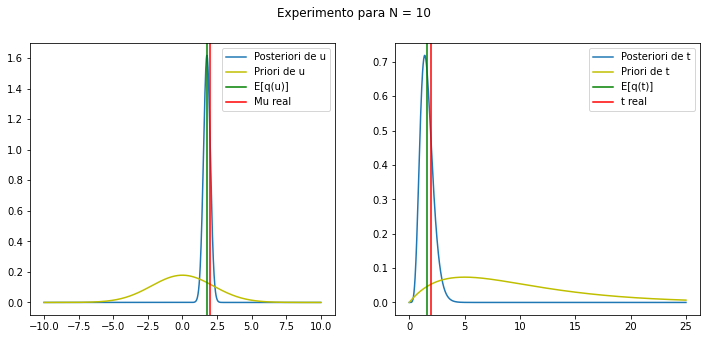

In [5]:
IVGU(X[0:10])

E[q(u)] = 2.0013788107434882
E[q(t)] = 1.476040224859728


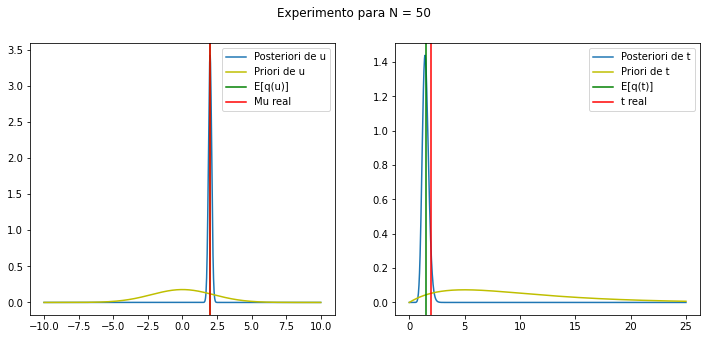

In [6]:
IVGU(X[0:50])

E[q(u)] = 2.015138732232253
E[q(t)] = 1.603450895289785


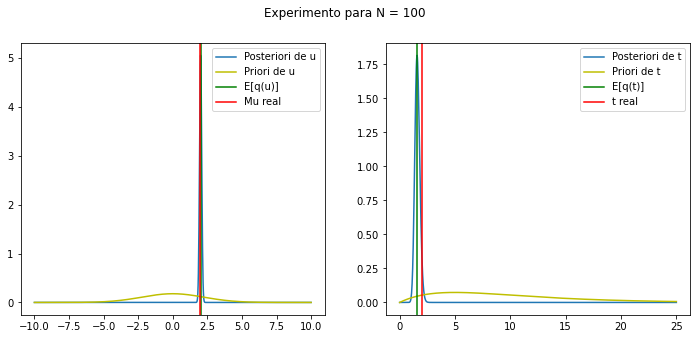

In [7]:
IVGU(X[0:100])

E[q(u)] = 2.000676963734147
E[q(t)] = 1.8222052629197498


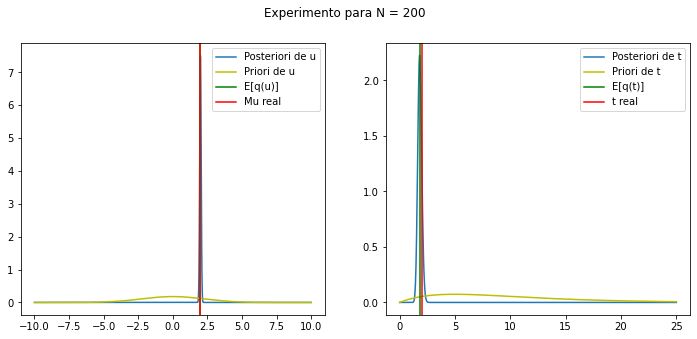

In [8]:
IVGU(X[0:200])

E[q(u)] = 1.9718858299448372
E[q(t)] = 1.9938130835768255


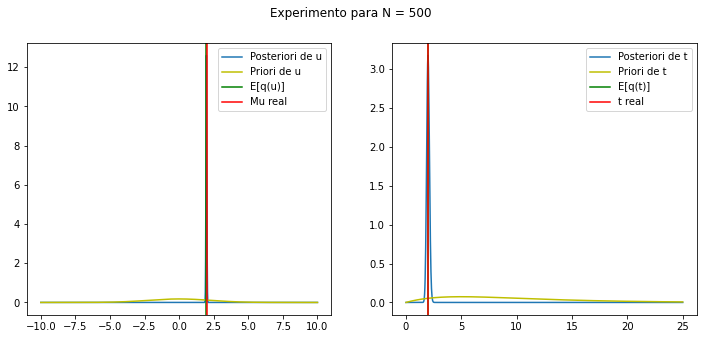

In [9]:
IVGU(X[0:500])
#gamma(an) = inf